# Analysis of data
In this notebook we'll look at the downloaded data and explore what it tells us

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point, LineString

In [2]:
geo_data_dir = '../data/geo_data'
weather_data_dir = '../data/weather_data'

* Load the shape file of NYC (this contains the shape files for each location below) and display it

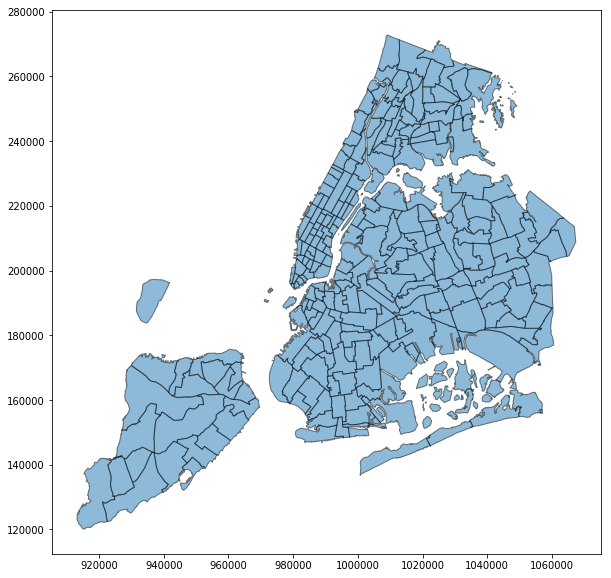

In [28]:
taxi_zones = geopandas.read_file('../data/taxi_zones').set_index('OBJECTID')
zone_ids = taxi_zones.index.tolist()
taxi_zones.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### Load the taxi data

* Start with green taxi cab data as this is smaller

In [4]:
green_tripdata_file = '../data/taxi_data/consolidated_green_tripdata.csv'
yellow_tripdata_file = '../data/taxi_data/consolidated_yellow_tripdata.csv'

* Load the trip data for green cabs and get its size

In [5]:
green_tripdata = pd.read_csv(green_tripdata_file, delimiter=',')
print(green_tripdata.shape)

(10108112, 8)


* See a sample of green cab trip data

In [6]:
green_tripdata.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount
0,2,2017-07-01 00:16:40,2017-07-01 00:17:02,264,193,1,0.00,3.80
1,2,2017-07-01 00:56:23,2017-07-01 00:59:30,14,14,1,0.81,5.80
2,2,2017-07-01 00:15:25,2017-07-01 00:34:24,112,61,1,4.97,23.16
3,2,2017-07-01 00:55:06,2017-07-01 00:59:08,92,92,1,0.83,6.80
4,2,2017-07-01 00:34:05,2017-07-01 00:50:44,75,79,1,4.99,19.30
5,2,2017-07-01 00:09:19,2017-07-01 00:16:58,61,188,1,1.72,9.30
6,2,2017-07-01 00:24:20,2017-07-01 00:30:54,188,89,1,1.88,8.80
7,2,2017-07-01 00:41:22,2017-07-01 01:13:02,89,71,1,1.74,21.30
8,2,2017-07-01 00:20:02,2017-07-01 00:39:31,255,129,1,5.85,26.16
9,2,2017-07-01 00:46:38,2017-07-01 01:12:26,255,181,2,6.38,29.75


* Clean up the data by removing rows with NANs, '0' in the data or PULocationID/DOLocationID not in taxi_zones

In [7]:
green_tripdata = green_tripdata[(green_tripdata != 0).all(1)].dropna()
green_tripdata = green_tripdata[(green_tripdata['PULocationID'].isin(zone_ids)) & 
                                (green_tripdata['DOLocationID'].isin(zone_ids))]
print(green_tripdata.shape)

(9946538, 8)


* View green cab trip data again

In [8]:
green_tripdata.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount
1,2,2017-07-01 00:56:23,2017-07-01 00:59:30,14,14,1,0.81,5.80
2,2,2017-07-01 00:15:25,2017-07-01 00:34:24,112,61,1,4.97,23.16
3,2,2017-07-01 00:55:06,2017-07-01 00:59:08,92,92,1,0.83,6.80
4,2,2017-07-01 00:34:05,2017-07-01 00:50:44,75,79,1,4.99,19.30
5,2,2017-07-01 00:09:19,2017-07-01 00:16:58,61,188,1,1.72,9.30
6,2,2017-07-01 00:24:20,2017-07-01 00:30:54,188,89,1,1.88,8.80
7,2,2017-07-01 00:41:22,2017-07-01 01:13:02,89,71,1,1.74,21.30
8,2,2017-07-01 00:20:02,2017-07-01 00:39:31,255,129,1,5.85,26.16
9,2,2017-07-01 00:46:38,2017-07-01 01:12:26,255,181,2,6.38,29.75
10,2,2017-07-01 00:07:32,2017-07-01 00:10:34,49,49,1,0.84,6.96


* Save this data in its cleansed form for later

In [9]:
green_tripdata.to_csv('../data/taxi_data/cleansed_green_tripdata.csv', sep=',')

### Restart here

TODO - Start by loading the CSV

In [ ]:
# green_tripdata = pd.read_csv('../data/taxi_data/cleansed_green_tripdata.csv', delimiter=',')

* Count of each pickup (PU) and drop-off (DO) location ID

In [10]:
green_count_by_PU = green_tripdata.groupby('PULocationID')['PULocationID'].count()
green_count_by_DO = green_tripdata.groupby('DOLocationID')['DOLocationID'].count()

### Render this data on a map of NYC

* Add centroids to each zone

In [30]:
taxi_zones['centroids'] = taxi_zones.geometry.centroid
taxi_zones.head(10)

,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,centroids
OBJECTID,,,,,,,
1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",POINT (935996.8210162065 191376.749530832)
2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",POINT (1031085.718603285 164018.7544032017)
3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",POINT (1026452.616873473 254265.4786585689)
4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",POINT (990633.9806410479 202959.7823911368)
5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",POINT (931871.3700680139 140681.3513759734)
6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",POINT (964319.735448061 157998.9356119239)
7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",POINT (1006496.679158681 216719.2181686789)
8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,...",POINT (1005551.57117787 222936.0875515854)
9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,...",POINT (1043002.677424325 212969.8490136597)


* This CRS will transform the map into lat/long coordinates

In [31]:
taxi_zones_crs = taxi_zones.crs
print(taxi_zones_crs)
# taxi_zones = taxi_zones.to_crs({'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True})

{'proj': 'lcc', 'lat_1': 40.66666666666666, 'lat_2': 41.03333333333333, 'lat_0': 40.16666666666666, 'lon_0': -74, 'x_0': 300000, 'y_0': 0, 'datum': 'NAD83', 'units': 'us-ft', 'no_defs': True}


* Let's view the shape file from geopandas
(See http://geopandas.org/index.html)

In [32]:
taxi_zones.head(10)

,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,centroids
OBJECTID,,,,,,,
1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",POINT (935996.8210162065 191376.749530832)
2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",POINT (1031085.718603285 164018.7544032017)
3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",POINT (1026452.616873473 254265.4786585689)
4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",POINT (990633.9806410479 202959.7823911368)
5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",POINT (931871.3700680139 140681.3513759734)
6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",POINT (964319.735448061 157998.9356119239)
7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",POINT (1006496.679158681 216719.2181686789)
8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,...",POINT (1005551.57117787 222936.0875515854)
9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,...",POINT (1043002.677424325 212969.8490136597)


* Add the count by ID to the taxi_zone geo dataframe

In [33]:
taxi_zones['Count_by_PULocationID'] = green_count_by_PU
taxi_zones['Count_by_DOLocationID'] = green_count_by_DO

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Text(0.5,1,'Volume of Pickups by Location')

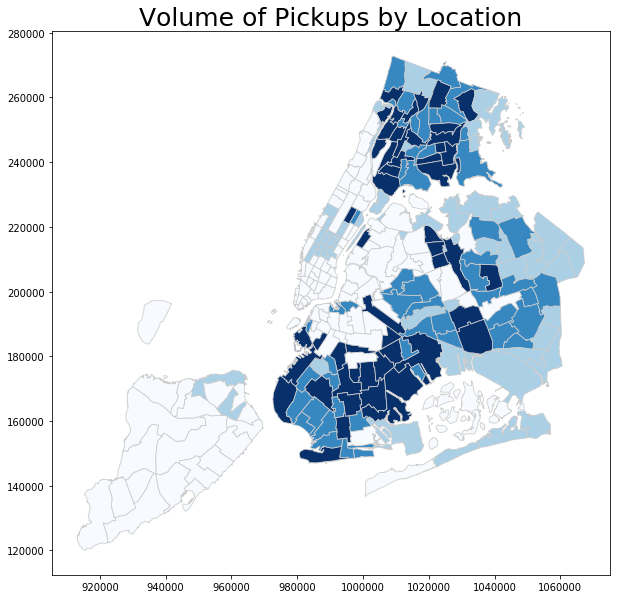

In [34]:
fig, ax = plt.subplots(1, figsize=(10, 10))
taxi_zones.plot(column='Count_by_PULocationID', cmap='Blues', scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Volume of Pickups by Location', fontdict={'fontsize': 25, 'fontweight' : 3})

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Text(0.5,1,'Volume of Drop-offs by Location')

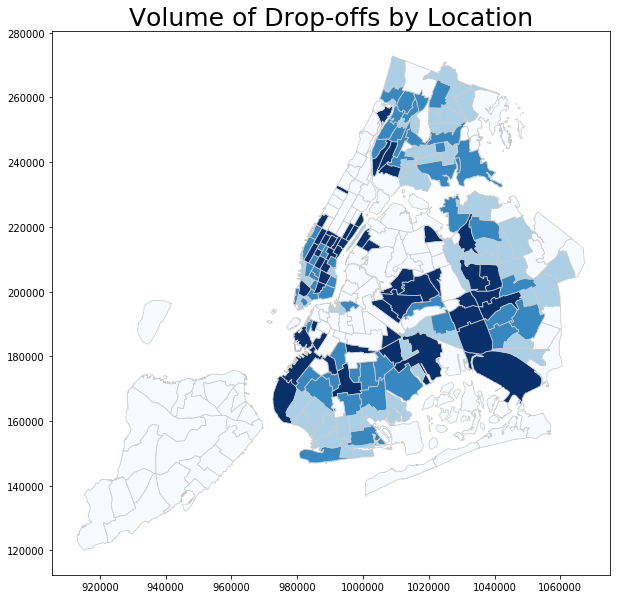

In [35]:
fig, ax = plt.subplots(1, figsize=(10, 10))
taxi_zones.plot(column='Count_by_DOLocationID', cmap='Blues', scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Volume of Drop-offs by Location', fontdict={'fontsize': 25, 'fontweight' : 3})

* Now calculate the number of trips by unique pickup/drop-off combination

In [36]:
green_count_by_trip = green_tripdata.groupby(['PULocationID', 'DOLocationID'])[['PULocationID', 'DOLocationID']].size().reset_index()
green_count_by_trip.rename(columns={0: 'count'}, inplace=True)
green_count_by_trip.head(10)

,PULocationID,DOLocationID,count
0,1,1,33
1,1,23,1
2,1,66,2
3,1,132,1
4,1,166,1
5,1,243,1
6,2,124,2
7,2,196,1
8,2,197,1
9,2,216,1


* Determine linestrings for each unique trip

* Join this table with the lat/long of each centroid so that we can draw lines representing each journey

In [41]:
for i, journey in green_count_by_trip.iterrows():
    print(journey[['PULocationID', 'DOLocationID']].values)
    start_centroid = taxi_zones.loc[journey['PULocationID'], 'centroids']
    end_centroid = taxi_zones.loc[journey['DOLocationID'], 'centroids']
    green_count_by_trip.loc[i, 'journey'] = LineString([start_centroid, end_centroid])

[1 1]
[1 23]
[1 66]
[1 132]
[1 166]
[1 243]
[2 124]
[2 196]
[2 197]
[2 216]
[2 257]
[3 3]
[3 4]
[3 7]
[3 10]
[3 16]
[3 17]
[3 18]
[3 20]
[3 24]
[3 25]
[3 28]
[3 29]
[3 30]
[3 31]
[3 32]
[3 37]
[3 38]
[3 39]
[3 41]
[3 42]
[3 43]
[3 45]
[3 46]
[3 47]
[3 48]
[3 50]
[3 51]
[3 53]
[3 55]
[3 58]
[3 59]
[3 60]
[3 61]
[3 65]
[3 68]
[3 69]
[3 70]
[3 71]
[3 74]
[3 75]
[3 76]
[3 78]
[3 79]
[3 81]
[3 82]
[3 85]
[3 86]
[3 88]
[3 90]
[3 91]
[3 93]
[3 94]
[3 95]
[3 97]
[3 98]
[3 100]
[3 107]
[3 108]
[3 112]
[3 113]
[3 116]
[3 117]
[3 119]
[3 122]
[3 124]
[3 126]
[3 127]
[3 129]
[3 130]
[3 132]
[3 136]
[3 137]
[3 138]
[3 140]
[3 141]
[3 142]
[3 143]
[3 145]
[3 146]
[3 147]
[3 148]
[3 152]
[3 153]
[3 159]
[3 160]
[3 161]
[3 162]
[3 163]
[3 164]
[3 166]
[3 167]
[3 168]
[3 169]
[3 170]
[3 174]
[3 175]
[3 177]
[3 178]
[3 181]
[3 182]
[3 183]
[3 184]
[3 185]
[3 186]
[3 188]
[3 191]
[3 193]
[3 195]
[3 200]
[3 201]
[3 203]
[3 205]
[3 208]
[3 209]
[3 210]
[3 212]
[3 213]
[3 214]
[3 215]
[3 216]
[3 218]
[3 219

KeyboardInterrupt: 

In [42]:
green_count_by_trip['journey']

0        LINESTRING (935996.8210162065 191376.749530832...
1        LINESTRING (935996.8210162065 191376.749530832...
2        LINESTRING (935996.8210162065 191376.749530832...
3        LINESTRING (935996.8210162065 191376.749530832...
4        LINESTRING (935996.8210162065 191376.749530832...
5        LINESTRING (935996.8210162065 191376.749530832...
6        LINESTRING (1031085.718603285 164018.754403201...
7        LINESTRING (1031085.718603285 164018.754403201...
8        LINESTRING (1031085.718603285 164018.754403201...
9        LINESTRING (1031085.718603285 164018.754403201...
10       LINESTRING (1031085.718603285 164018.754403201...
11       LINESTRING (1026452.616873473 254265.478658568...
12       LINESTRING (1026452.616873473 254265.478658568...
13       LINESTRING (1026452.616873473 254265.478658568...
14       LINESTRING (1026452.616873473 254265.478658568...
15       LINESTRING (1026452.616873473 254265.478658568...
16       LINESTRING (1026452.616873473 254265.478658568.

* Now plot on the map of NYC

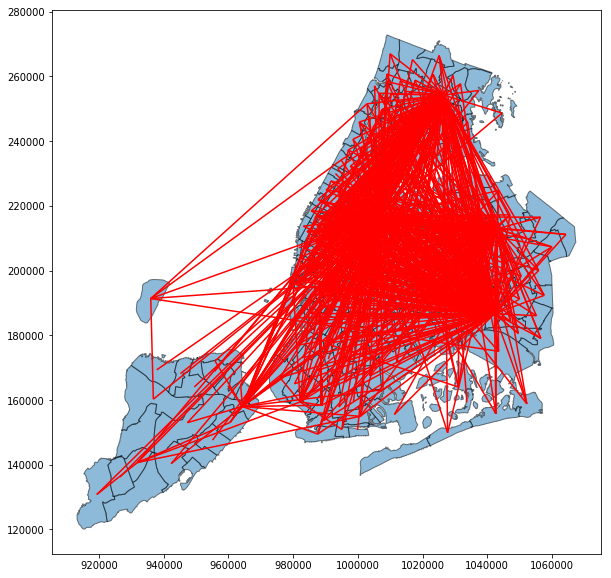

In [43]:
ax = taxi_zones.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
journeys = geopandas.GeoDataFrame(green_count_by_trip, geometry='journey')
journeys.crs = taxi_zones.crs  #{'init': 'epsg:4326'}
# journeys.to_crs(taxi_zones.crs)
journeys.plot(ax=ax, color='red')